In [205]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [155]:
data = pd.read_csv('/kaggle/input/college-football-attendance-2000-to-2018/CFBeattendance.csv',encoding='latin')

In [156]:
data.sample(1)

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
5803,11/13/2004,Ohio,1:00 PM,Akron,NR,"Peden StadiumAthens, OH",Not on TV,L 1931,11775,4,...,0.06,0.0,0.0,44,31,NR,Mid-American,2004,11,13


In [157]:
fetures_drop = ['Date','Team','Site']

data.drop(fetures_drop , axis=1 , inplace=True)

In [158]:
data.drop('Opponent',axis=1,inplace=True)

In [159]:
data.drop([4355,5442,5456,5449],axis=0,inplace=True)

In [160]:
data.dtypes == 'object'

Time                 True
Rank                 True
TV                   True
Result               True
Attendance          False
Current Wins        False
Current Losses      False
Stadium Capacity    False
Fill Rate           False
New Coach           False
Tailgating          False
PRCP                False
SNOW                False
SNWD                False
TMAX                False
TMIN                False
Opponent_Rank        True
Conference           True
Year                False
Month               False
Day                 False
dtype: bool

In [161]:
#list(data['Result'].unique())

In [162]:
data['Rank'].unique()

array(['NR', '14', '7', '11', '17', '15', '13', '5', '20', '10', '21',
       '19', '12', '8', '6', '18', '24', '16', '22', '25', '23', '9', '4',
       '2', '3', '1'], dtype=object)

In [163]:
data['Rank'] = data['Rank'].apply(lambda x: 26 if x=='NR' else np.int(x))

/tmp/ipykernel_32/226012218.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Rank'] = data['Rank'].apply(lambda x: 26 if x=='NR' else np.int(x))


In [164]:
data['TV'] = data['TV'].apply(lambda x: 0 if x == 'Not on TV' else 1 )

In [165]:
ordinal = sorted(data['Time'].unique())

In [166]:
data['Time'] = data['Time'].apply(lambda x: ordinal.index(x))

In [167]:
data['Opponent_Rank'] = data['Opponent_Rank'].apply(lambda x: 26 if x=='NR' else np.int(x))

/tmp/ipykernel_32/1589539380.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Opponent_Rank'] = data['Opponent_Rank'].apply(lambda x: 26 if x=='NR' else np.int(x))


In [168]:
data['Conference']

0        SEC
1        SEC
2        SEC
3        SEC
4        SEC
        ... 
6667    CUSA
6668    CUSA
6669    CUSA
6670    CUSA
6671    CUSA
Name: Conference, Length: 6668, dtype: object

In [169]:
encoder = LabelEncoder()

data['Conference'] = encoder.fit_transform(data['Conference'])

In [170]:
y = data['Result']
x = data.drop('Result',axis=1)

In [171]:
x['New Coach'] = x['New Coach'].astype(np.int)

/tmp/ipykernel_32/3174654646.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x['New Coach'] = x['New Coach'].astype(np.int)


In [172]:
x['Tailgating'] = x['Tailgating'].astype(np.int)

/tmp/ipykernel_32/180775402.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x['Tailgating'] = x['Tailgating'].astype(np.int)


In [173]:
x.dtypes

Time                  int64
Rank                  int64
TV                    int64
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach             int64
Tailgating            int64
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank         int64
Conference            int64
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [174]:
y = y.apply(lambda x : re.search('^[^\s]*' , x).group(0))

In [175]:
y[y=='NC'] , y[y == 'White'] , y[y == 'Blue' ]

(Series([], Name: Result, dtype: object),
 Series([], Name: Result, dtype: object),
 Series([], Name: Result, dtype: object))

In [176]:
#data.drop([4355,5442,5456,5449],axis=0,inplace=True)

In [177]:
y.unique()

array(['W', 'L'], dtype=object)

In [178]:
encodern = LabelEncoder()
y = encodern.fit_transform(y)

In [179]:
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [189]:
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size=0.85)

In [235]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(20))
model.add(tf.keras.layers.Dense(22,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

epochs = 200

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001)
              ,loss=tf.losses.binary_crossentropy
              ,metrics=tf.metrics.AUC(name='auc'))

In [236]:
fit_model = model.fit(x_train
                      ,y_train
                      ,validation_split=0.2
                      ,epochs=epochs,verbose=0)

In [246]:
train_loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

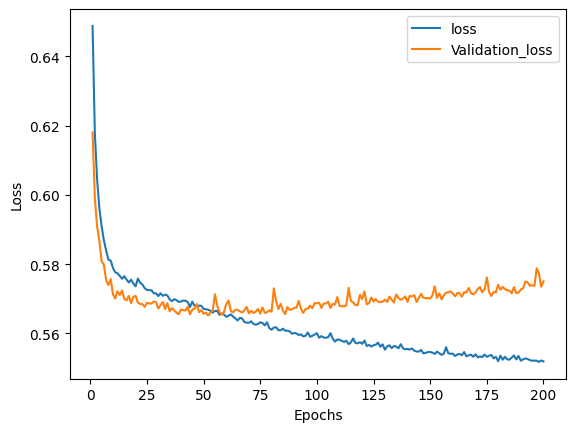

In [245]:

epoc = range(1,epochs+1)

plt.plot(epoc,fit_model.history['loss'],label='loss')
plt.plot(epoc,fit_model.history['val_loss'],label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
